In [51]:
import json
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure


In [21]:
class ReadWriteDatatoCSV():
    def __init__(self, path1, path2, name):
        self.root_directory = os.path.join(path1, path2, name)
        self.sensor_date = path2
        #self.csv_name = path3 + '.csv'
        #self.store_path = os.path.join(path1, 'HPD_csv')
        self.data = {'time':[], 'tvoc_ppb':[], 'temp_c':[], 'rh_percent':[], 'light_lux':[], 'co2eq_ppm':[], 'dist_mm':[],'tvoc_base':[], 'co2eq_base':[]}
        self.sensor = name
        
    def mylistdir(self, directory):
        filelist = os.listdir(directory)
        return [x for x in filelist if not (x.startswith('.'))]      

    def read_in_data(self, path):
        with open(path, 'r') as f:
            self.data_dicts = json.loads(f.read())
            for time_point in self.data_dicts:
                for measure in time_point:
                    self.data[measure].append(time_point[measure])        

    def get_all_data(self, path):
        sub_folders = self.mylistdir(self.root_directory)
        for folder in sub_folders:
            file_path = os.path.join(self.root_directory, folder)
            sub_files = self.mylistdir(file_path)         
            for file in sub_files:
                data_path = os.path.join(file_path, file)
                self.read_in_data(os.path.join(file_path, file))

    def main(self):
        self.get_all_data(self.root_directory)
        new_df = pd.DataFrame.from_dict(self.data)
        self.plotting()
        
        #write_path_name = os.path.join(self.store_path, self.csv_name)
        #new_df.to_csv(write_path_name)

In [ ]:
static_path = '/Users/maggie/Desktop/HPD_mobile'
dynamic_path = 'env_tests/2day_2_13/BS6/2019-02-12'
full_path = os.path.join(static_path, dynamic_path)

P = StaticPlot(static_path, dynamic_path)
P.main()

In [81]:
dates = ['2019-02-12','2019-02-13']
sensors = ['BS6', 'BS5', 'BS4', 'BS3', 'BS2', 'BS1']
start_path = '/Users/maggie/Desktop/HPD_mobile/HPD_csv/'

all_dfs = {}
num_nans = {}

#reading in csv files and writing as dataframes
for sensor in sensors:
    frames = []
    for date in dates:
        end_path = os.path.join(start_path, str(sensor + '-' + date + '.csv'))
        df = pd.read_csv(end_path)
        datetime_col = df['time'].str.split('T', n = 1, expand = True)
        df.insert(loc = 0, column = 'time_hour', value = datetime_col[1].str.replace('Z',''))
        df.insert(loc = 0, column = 'date', value = datetime_col[0])
        df = df.drop(columns = ['time', 'Unnamed: 0'])
        df = df.sort_values(by = ['date', 'time_hour'])
        frames.append(df)
                
    name = str(sensor)
    sensor_df = pd.concat(frames, ignore_index = True)
    na_counts = sensor_df.isnull().sum()
    num_nans[sensor] = na_counts
        
    all_dfs[name] = sensor_df 
    test_df = sensor_df

# dataset analytics
number and percent of missing data values (nans)
percent of captured data points


In [92]:
percent_nans = {}

for df in all_dfs: 
    frame = all_dfs[df]
    end = frame['time_hour'].tail(1)
    perc = num_nans[df]/len(frame)
    high = 100 * perc.max()
    percent_nans[df] = high
print(percent_nans)

{'BS6': 4.722651554181693, 'BS5': 4.993673555461831, 'BS4': 5.2768021408262245, 'BS3': 5.055476766497039, 'BS2': 4.773703336636935, 'BS1': 30.87160108436704}


In [85]:
print(num_nans)    


{'BS6': date            0
time_hour       0
tvoc_ppb        0
temp_c        550
rh_percent    550
light_lux       0
co2eq_ppm       0
dist_mm         0
tvoc_base       0
co2eq_base      0
dtype: int64, 'BS5': date            0
time_hour       0
tvoc_ppb        0
temp_c        592
rh_percent    592
light_lux       0
co2eq_ppm       0
dist_mm         0
tvoc_base       0
co2eq_base      0
dtype: int64, 'BS4': date            0
time_hour       0
tvoc_ppb        0
temp_c        631
rh_percent    631
light_lux       0
co2eq_ppm       0
dist_mm         0
tvoc_base       0
co2eq_base      0
dtype: int64, 'BS3': date            0
time_hour       0
tvoc_ppb        0
temp_c        606
rh_percent    606
light_lux       0
co2eq_ppm       0
dist_mm         0
tvoc_base       0
co2eq_base      0
dtype: int64, 'BS2': date            0
time_hour       0
tvoc_ppb        0
temp_c        578
rh_percent    578
light_lux       0
co2eq_ppm       0
dist_mm         0
tvoc_base       0
co2eq_base      0
dtype: i

Sensor Hub BS6


AttributeError: Unknown property ylim

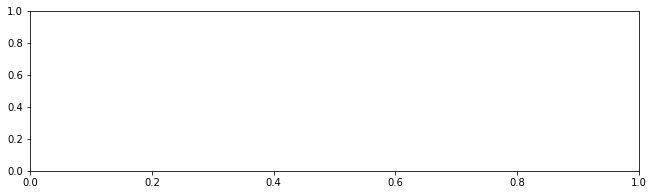

In [95]:
measures_to_plot = ['tvoc_ppb','temp_c','rh_percent','light_lux','co2eq_ppm','dist_mm']
colors = ['green', 'red', 'blue', 'orange', 'brown', 'grey']


for m, df in enumerate(all_dfs):
    print("Sensor Hub " + df)
    for n, measure in enumerate(measures_to_plot):
        plt.figure(figsize = (24,10))
        plt.subplot(3,2,n+1)

        plt.plot(all_dfs[df][measure], color = colors[m])
        if measure == 'rh_percent':
            plt.ylim = (0,100)
        plt.ylabel(measure)

        plt.savefig(df + ' - ' + measure)
    plt.show()  
